In [21]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
df = pd.read_csv('beer_data.csv')
df.head(20)

,ABV,Ratings,Cellar Temperature,Score
0,6.5,22,40-45,3.28
1,5.5,1,35-40,3.52
2,8.1,3,35-40,4.01
3,NaN,0,35-40,0.00
4,6.0,1,35-40,2.73
5,7.4,1,40-45,3.86
6,3.0,15,40-45,3.77
7,5.5,6,40-45,3.67
8,6.5,4,40-45,3.97
9,11.3,12,45-50,4.24


In [22]:
df.isnull().sum()

ABV                   15130
Ratings                   0
Cellar Temperature     6781
Score                     0
dtype: int64

In [23]:
# impu = SimpleImputer(missing_values=np.nan,strategy='mean')
# impu.fit(df['ABV'])
# # shape
m = df['ABV'].mean()
df['ABV'].fillna(value=m,inplace=True)

In [24]:
df.dropna(subset =['Cellar Temperature'],inplace=True)

In [25]:
df.loc[:,'min_cell_temp'] = df['Cellar Temperature'].apply(lambda x:int(str(x).split('-')[0].strip()))
# df['min_cell_temp']
df.loc[:,'max_cell_temp'] = df['Cellar Temperature'].apply(lambda x:int(str(x).split('-')[1].strip()))
# df
df.drop(axis=1,labels=['Cellar Temperature'],inplace=True)

In [45]:
df

,ABV,Ratings,min_cell_temp,max_cell_temp,Score
0,6.500000,22,40,45,3.28
1,5.500000,1,35,40,3.52
2,8.100000,3,35,40,4.01
3,6.354961,0,35,40,0.00
4,6.000000,1,35,40,2.73
...,...,...,...,...,...
185637,7.000000,0,40,45,0.00
185639,4.500000,1,35,40,4.19
185640,6.354961,1,40,45,3.11
185641,6.200000,2,40,45,3.40


In [46]:
cols = ['ABV','Ratings','min_cell_temp','max_cell_temp','Score']
df = df[cols]
df

,ABV,Ratings,min_cell_temp,max_cell_temp,Score
0,6.500000,22,40,45,3.28
1,5.500000,1,35,40,3.52
2,8.100000,3,35,40,4.01
3,6.354961,0,35,40,0.00
4,6.000000,1,35,40,2.73
...,...,...,...,...,...
185637,7.000000,0,40,45,0.00
185639,4.500000,1,35,40,4.19
185640,6.354961,1,40,45,3.11
185641,6.200000,2,40,45,3.40


In [47]:
df['Ratings'] = df['Ratings'].apply(lambda x : np.float32(x.replace(",", "")))

In [48]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]

In [50]:
Y

,Score
0,3.28
1,3.52
2,4.01
3,0.00
4,2.73
...,...
185637,0.00
185639,4.19
185640,3.11
185641,3.40


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.29)

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
regressorModel = DecisionTreeRegressor(max_features='auto',max_depth=4,min_samples_leaf=2)

In [80]:
# c = X['ABV'].str.contains(',').sum()
# c
X.dtypes
# for i in range(len(X)):
#     if(type(X['Ratings'][i])==str):
#         print(X['Ratings'][i])

ABV              float64
Ratings          float32
min_cell_temp      int64
max_cell_temp      int64
dtype: object

In [81]:
regressorModel.fit(X_train,Y_train)
Y_pred = regressorModel.predict(X_test)
Y_pred

array([0.        , 3.75902911, 0.        , ..., 3.68296946, 3.68296946,
       3.68296946])

In [82]:
import matplotlib.pyplot as plt


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


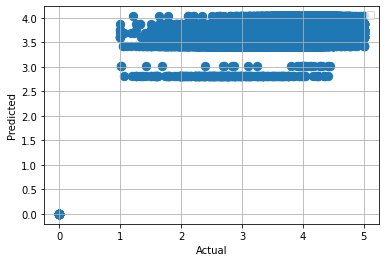

In [83]:
plt.scatter(Y_test, Y_pred, s = 70)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend();
plt.grid();
plt.show();

In [84]:
from sklearn.tree import plot_tree


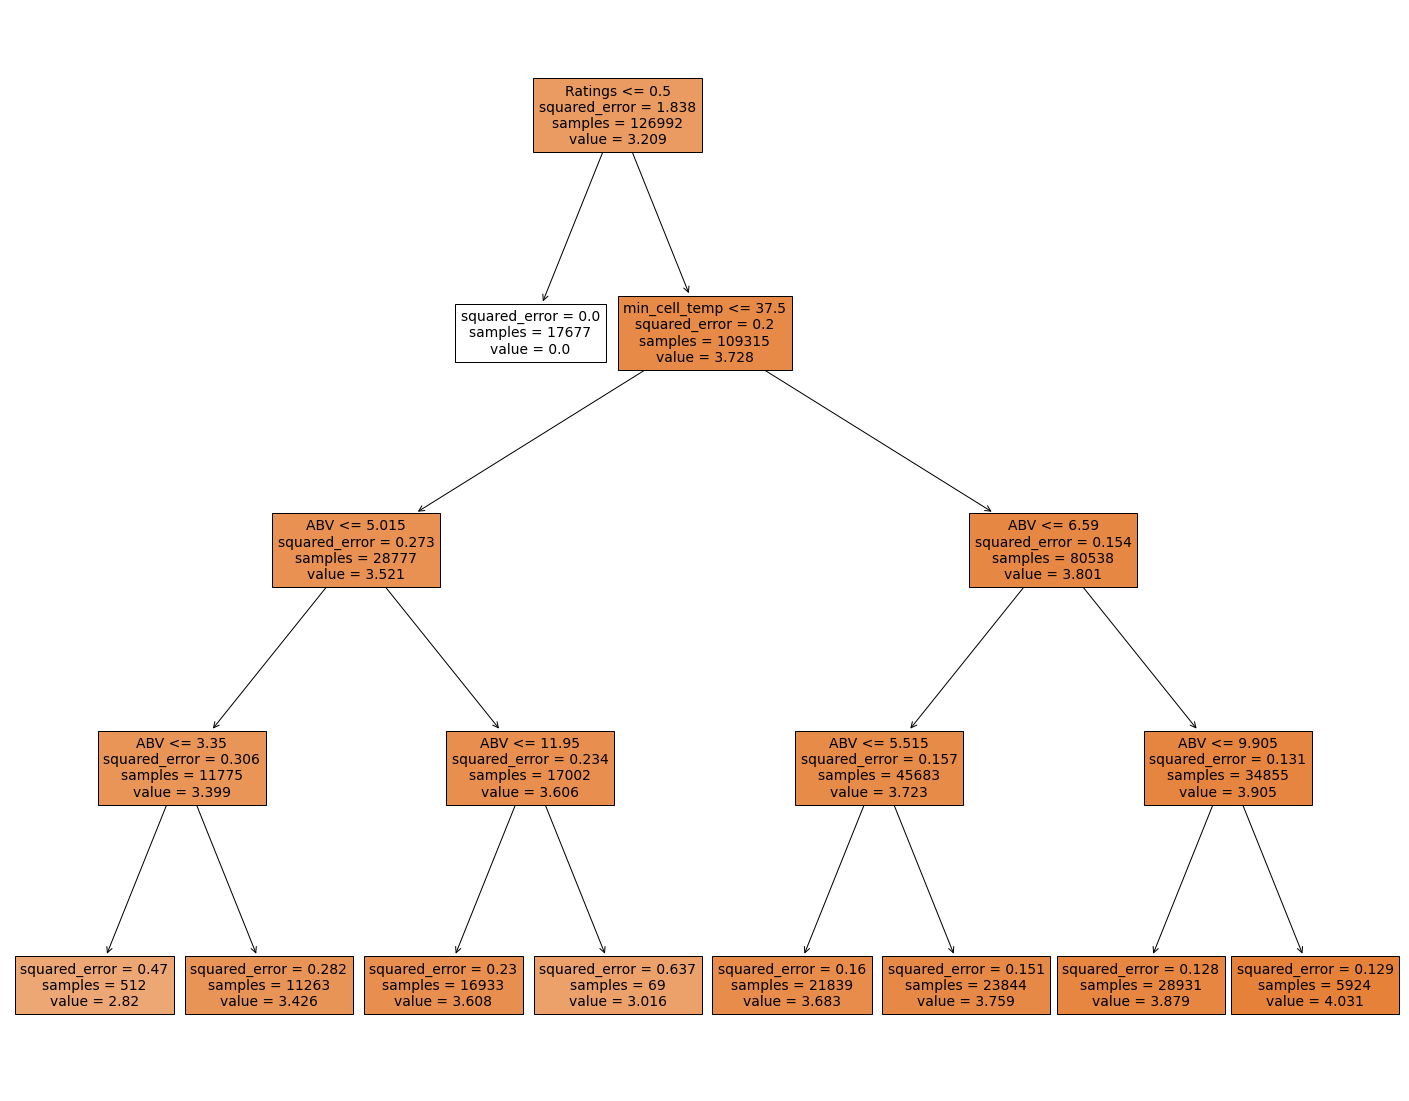

In [85]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(regressorModel,
          feature_names=X.columns,
          class_names=Y.columns,
          filled=True)

In [92]:
score = regressorModel.score(X_test, Y_test)
score

0.9190623540660362